In [150]:
#!pip install pandas sklearn matplotlib seaborn

In [151]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
file_path = "C:/Users/afili/Desktop/Uni/Mestrado/AASE/apartments_for_rent_100k_final.csv"
data = pd.read_csv(file_path, sep=';')

In [153]:
features = [
    'bathrooms', 'bedrooms', 'square_feet', 'pets_allowed_transformed',
    'cityname_transformed', 'has_photo_transformed', 'AC', 'Alarm', 'Basketball',
    'Cable or Satellite', 'Clubhouse', 'Dishwasher', 'Doorman', 'Elevator',
    'Fireplace', 'Garbage Disposal', 'Gated', 'Golf', 'Gym', 'Hot Tub',
    'Internet Access', 'Luxury', 'Parking', 'Patio/Deck', 'Playground',
    'Pool', 'Refrigerator', 'Storage', 'TV', 'Tennis', 'View', 'Washer Dryer',
    'Wood Floors'
]
X = data[features]

In [154]:
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

In [155]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [156]:
def plot_elbow_method(X):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    return distortions

In [157]:
distortions = plot_elbow_method(X_scaled)

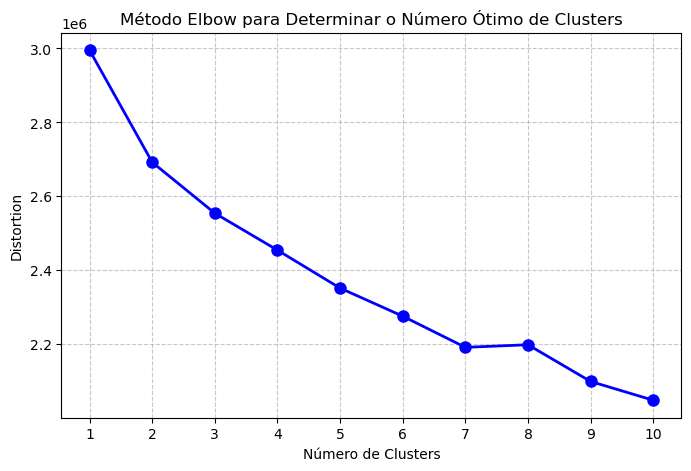

In [158]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, 'bo-', linewidth=2, markersize=8)
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Número de Clusters')
plt.ylabel('Distortion')
plt.title('Método Elbow para Determinar o Número Ótimo de Clusters')
plt.show()

In [159]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
data['cluster'] = kmeans.labels_

In [160]:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Coeficiente de Silhueta para K-Means: {silhouette_avg:.2f}")

Coeficiente de Silhueta para K-Means: 0.31


In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


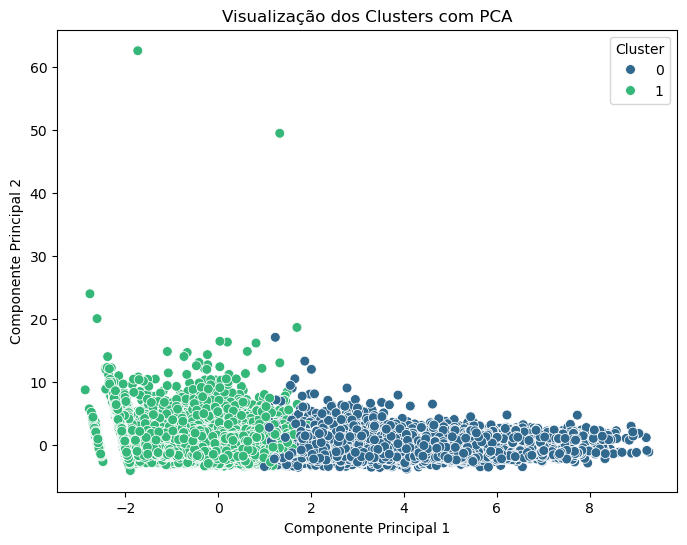

In [162]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster'], palette='viridis', s=50)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

In [163]:
numeric_features = data[features].select_dtypes(include=['number']).columns
cluster_summary = data.groupby('cluster')[numeric_features].mean()
print("Resumo das Características por Cluster:")
print(cluster_summary)



Resumo das Características por Cluster:
         bathrooms  bedrooms  square_feet        AC     Alarm  Basketball  \
cluster                                                                     
0         1.430508  1.687849   921.761587  0.580421  0.017750    0.120138   
1         1.447523  1.734226   964.094708  0.064433  0.000478    0.024072   

         Cable or Satellite  Clubhouse  Dishwasher   Doorman  ...  Patio/Deck  \
cluster                                                       ...               
0                  0.515175   0.499069    0.696779  0.004273  ...    0.687849   
1                  0.038743   0.123376    0.048316  0.001753  ...    0.172317   

         Playground      Pool  Refrigerator   Storage        TV    Tennis  \
cluster                                                                     
0          0.331599  0.714309      0.597403  0.423250  0.095486  0.187137   
1          0.065255  0.375313      0.049750  0.171471  0.033914  0.062754   

             View

Distribuição de Clusters por Cidade:
cluster                   0      1
cityname_transformed              
Arlington               336   1241
Atlanta                 221   1290
Charlotte               207    915
Dallas                  425   2441
Denver                  374   2389
Las Vegas               460   1399
Los Angeles             511   1924
Other                 15720  69989


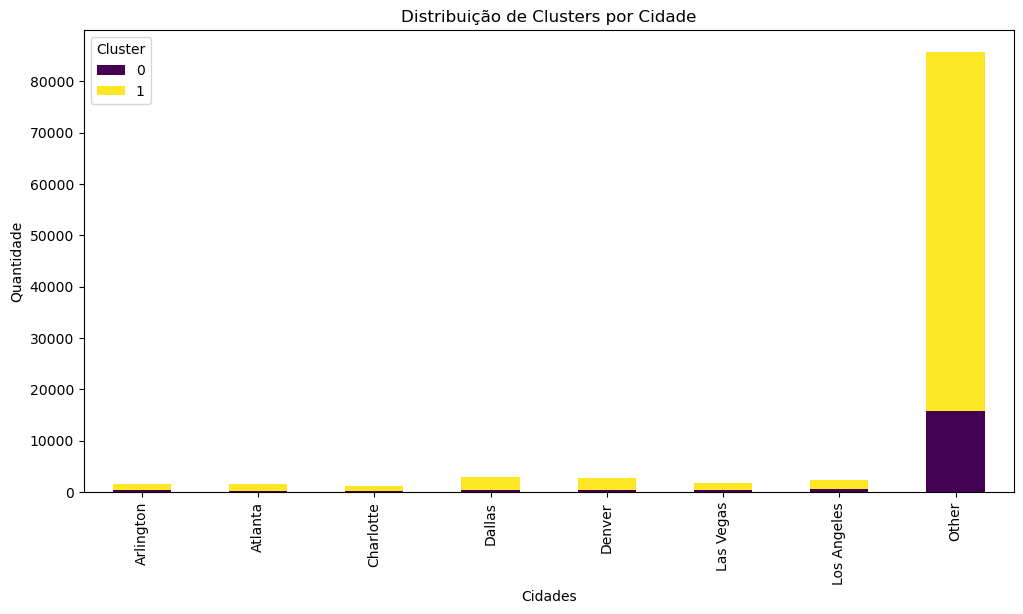

In [164]:
# Contagem de clusters por cidade
cluster_city_distribution = data.groupby(['cityname_transformed', 'cluster']).size().unstack()
print("Distribuição de Clusters por Cidade:")
print(cluster_city_distribution)

# Visualizar a distribuição dos clusters por cidade
cluster_city_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Distribuição de Clusters por Cidade")
plt.xlabel("Cidades")
plt.ylabel("Quantidade")
plt.legend(title="Cluster")
plt.show()
